In [48]:
import pandas as pd
df = pd.read_csv('Ice Cream Sales - temperatures.csv')
print(df.head())
df.shape

   Temperature  Ice Cream Profits
0           39              13.17
1           40              11.88
2           41              18.82
3           42              18.65
4           43              17.02


(365, 2)

<AxesSubplot:xlabel='Ice Cream Profits'>

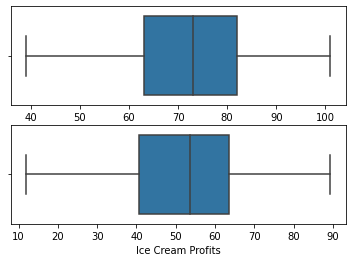

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(2)
sns.boxplot(x='Temperature',data = df,ax = ax1)
sns.boxplot(x='Ice Cream Profits',data = df,ax = ax2)

No outliers were detected during the plotting of boxplots using seaborn and matplotlib.

In [50]:
df = df.rename(columns={'Temperature':'x', 'Ice Cream Profits':'y'})
df.head(10)

,x,y
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02
5,43,15.88
6,44,19.07
7,44,19.57
8,45,21.62
9,45,22.34


In [51]:
mean_x = df['x'].mean()  # Calculate the mean of 'x'
df['x-xbar'] = df['x'].apply(lambda x: x - mean_x)  # Calculate the deviation from the mean

mean_y = df['y'].mean()  # Calculate the mean of 'y'
df['y-ybar'] = df['y'].apply(lambda y: y - mean_y)  # Calculate the deviation from the mean
df.head()

,x,y,x-xbar,y-ybar
0,39,13.17,-32.980822,-38.933616
1,40,11.88,-31.980822,-40.223616
2,41,18.82,-30.980822,-33.283616
3,42,18.65,-29.980822,-33.453616
4,43,17.02,-28.980822,-35.083616


In [52]:
# Calculating slope (m/b1) and intercept (bo)
m = (df['x-xbar'] * df['y-ybar']).sum() / (df['x-xbar'] ** 2).sum()
b = mean_y - m * mean_x

In [55]:
print("Slope (b1):", m)
print("Intercept (b0):", b)

Slope (m): 1.192008928972838
Intercept (b): -33.698166002474956


In [53]:
# Define function to predict 'y' based on 'x'
def predict_y(x):
    return m * x + b

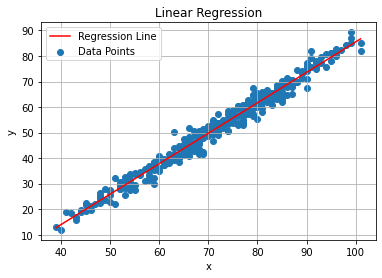

In [54]:
# Plot data points and regression line
plt.scatter(df['x'], df['y'], label='Data Points')
plt.plot(df['x'], predict_y(df['x']), color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming you have a DataFrame 'df' with 'x' and 'y' columns
# Your data preparation steps (e.g., mean calculation, deviations) would go here

# Extract independent variable 'x' and dependent variable 'y' from DataFrame
X = df[['x']]  # Independent variable
y = df['y']    # Dependent variable

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)
y_pred = model.predict(X)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


Intercept: -33.698166002474984
Coefficient: [1.19200893]


In [66]:
# Calculate SSR (Sum of Squares Regression)
ssr = ((y_pred - y.mean()) ** 2).sum()

# Calculate SSE (Sum of Squares Error)
sse = ((y - y_pred) ** 2).sum()

# Calculate SST (Total Sum of Squares)
sst = ((y - y.mean()) ** 2).sum()

# Calculate R-squared (Coefficient of Determination)
r_squared = 1 - (sse / sst)

# Print the results
print("SSR (Sum of Squares Regression):", ssr)
print("SSE (Sum of Squares Error):", sse)
print("SST (Total Sum of Squares):", sst)
print("R-squared (Coefficient of Determination):", r_squared)

SSR (Sum of Squares Regression): 90917.9960943508
SSE (Sum of Squares Error): 2137.9657319506023
SST (Total Sum of Squares): 93055.96182630135
R-squared (Coefficient of Determination): 0.9770249461722685


Here R-squared is closer to 1 says that the model perfectly explains the variability in the dependent variable.